# Support Vector Machines

- SVM is a powerful classifier that works both on linearly and non-linearly separable data

<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/linearly_separable.PNG?raw=true" alt="Linear Separable" style="width: 500px;"/>

- Finds an optimal hyperplane, that best separates our data so that the distance from nearest points in space to itself(also called margin) is maximized

- These nearest points are called **Support Vectors**

<figure>
 <img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/svm_margin.png?raw=true" alt="Pizza-1" style="width: 300px;"/> 
 <figcaption>
 Image By - <a href="//commons.wikimedia.org/w/index.php?title=User:Larhmam&amp;action=edit&amp;redlink=1" class="new" title="User:Larhmam (page does not exist)">Larhmam</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=73710028">Link</a>
 </figcaption>
 
- For the non-linearly separable case, it uses something called 'Kernel Trick' which will go through in the next part.

## What does hyperplane mean ?
<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/hyperplanes.jpg?raw=true" alt="Hyperplanes" style="width: 250px;"/>

A hyperplane is plane of _n-1_ dimensions in _n_ dimensional feature space, that separates the two classes. For a 2-D feature space, it would be a line and for a 3-D Feature space it would be plane and so on.

<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/3d_hyperplane.png?raw=true" alt="Hyperplanes" style="width: 200px;"/>

A hyperplane is able to separate classes if for all points -
#### **_w_ x** + b > 0 
(For data points in class 1)  
#### **_w_ x** + b < 0 
(For data points in  class 0)

## Maximum Margin Hyperplane 
 
An optimal hyperplane best separates our data so that the distance/margin from nearest points(called Support Vectors) in space to itself is maximized.

<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/maximum_margin.png?raw=true" alt="Hyperplanes" style="width: 400px;"/>

### SVM Implementation using Pegasos

**Formulating SVM as Unconstrainted Optimization Problem**

Paper - [Pegasos: Primal Estimated sub-GrAdient SOlver for SVM](http://www.ee.oulu.fi/research/imag/courses/Vedaldi/ShalevSiSr07.pdf)

The final SVM Objective we derived was -
<img src="https://github.com/coding-blocks-archives/machine-learning-online-2018/blob/master/12.%20Support%20Vector%20Machines/img/loss.png?raw=true" alt="Hinge Loss" style="width: 400px;"/>

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [3]:
X,Y = make_classification(n_classes=2, n_samples=400, n_clusters_per_class=1, n_features=2, n_informative=2, n_redundant=0, random_state=3)

In [16]:
# Convert Y labels into {-1,1}
Y[Y==0] = -1

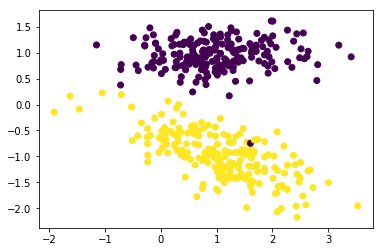

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [41]:
class SVM:
    def __init__(self, C=1.0):
        self.c = C
        self.W = 0
        self.B = 0
        
    def changeC(self, C):
        self.c = C
    
    def hingeLoss(self,X,Y,W,B):
        loss = 0.0
        loss += 0.5*np.dot(W, W.T)
        m = X.shape[0]
        for i in range(m):
            t = Y[i]*(np.dot(W,X[i].T)+B)
            loss += self.c*max(0, 1-t)
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001, max_itr=100):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        W = np.zeros((1,no_of_features))
        B = 0        
        
        losses = []
        
        for itr in range(max_itr):
            
            l = self.hingeLoss(X,Y,W,B)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            # Batch gradient descent with random shuffling
            for batchStart in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for batch
                gradW = 0
                gradB = 0
                # Mini batch iteration
                for j in range(batchStart, min(no_of_samples,batchStart+batch_size)):
                    
                    i = ids[j]
                    t = Y[i]*(np.dot(W,X[i].T)+B)
                    
                    if t>=1:
                        gradW += 0
                        gradB += 0
                    else:
                        gradW += self.c * Y[i] * X[i]
                        gradB += self.c * Y[i]
                
                # Update W,B using gradients
                W = W - learning_rate*W + learning_rate*gradW
                B = B + learning_rate*gradB
                
        self.W = W
        self.B = B
        return W,B,losses

In [42]:
mySVM = SVM()
W,B,losses = mySVM.fit(X,Y)

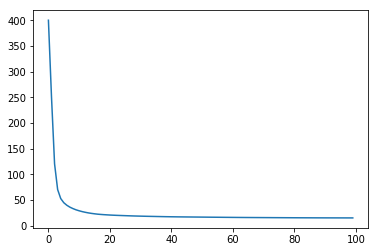

In [43]:
plt.plot(losses)
plt.show()

In [44]:
print(W[0],B)

[-0.32267387 -2.03382068] 0.388


## Visualing Hyperplanes, Positive and Negative Support vectors

In [82]:
def plotHyperplane(W,B):
    x1 = np.arange(-2,5)
    x2 = -(B+W[0]*x1)/W[1]
    
    # Support vectors
    xp = -(B+W[0]*x1-1)/W[1]
    xn = -(B+W[0]*x1+1)/W[1]
    
    plt.plot(x1,x2, label="WX+B=0")
    plt.plot(x1,xp, label="WX+B=1")
    plt.plot(x1,xn, label="WX+B=-1")
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.legend()

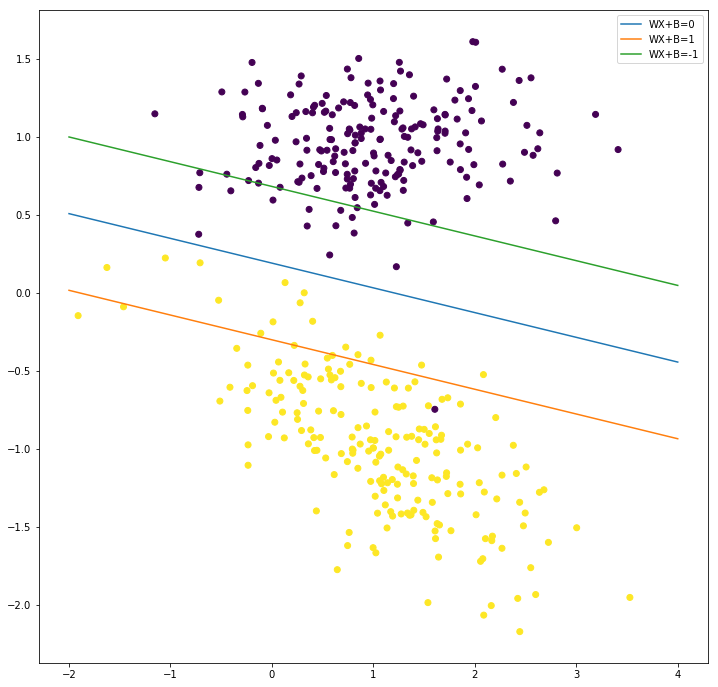

In [46]:
# Outlier handled
plotHyperplane(W[0],B)

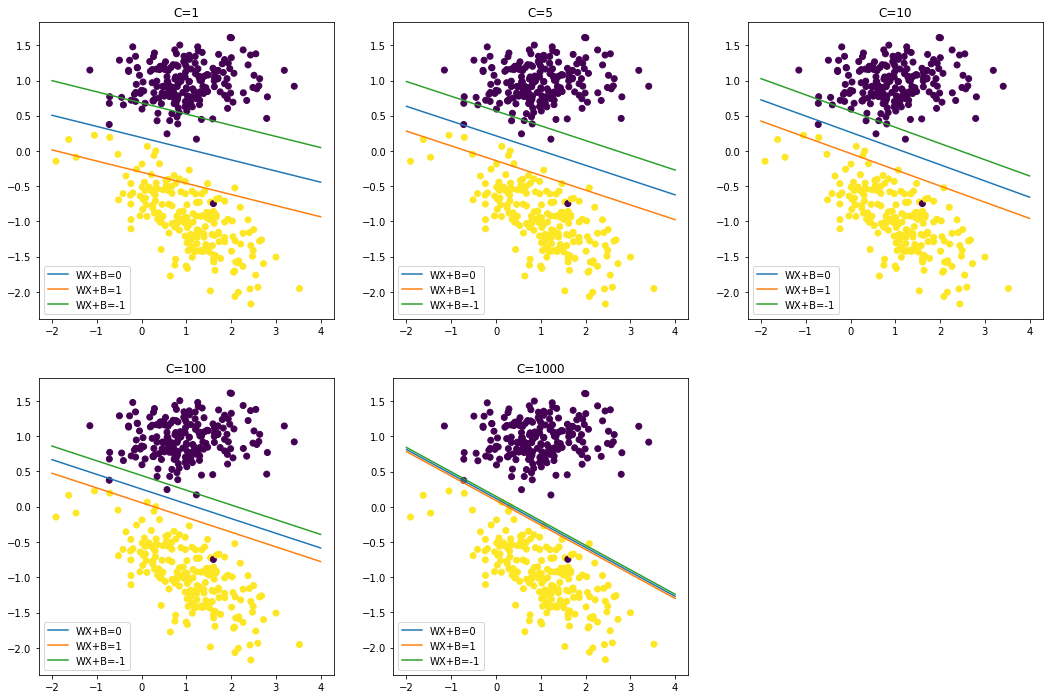

In [89]:
cVals = [1, 5, 10, 100, 1000]
plt.figure(0, figsize=(18,12))
for i in range(5):
    plt.subplot(2,3,i+1);
    plt.title("C="+str(cVals[i]))
    mySVM.changeC(cVals[i])
    W,B,losses = mySVM.fit(X,Y)
    plotHyperplane(W[0],B)
plt.show()

400000.0 16858.5912966


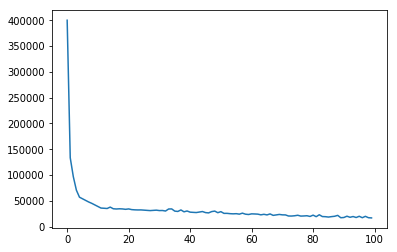

In [92]:
# Loss for c=1000
# Loss is high due to high penalty for misclassification
print(losses[0], losses[-1])
plt.plot(losses)
plt.show()